# Sprint 2

## Importing Libaraies

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Load DataSet

In [236]:
df =  pd.read_csv(r"water_data.csv", encoding = 'unicode_escape')

In [237]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


## Descriptive Statistics

In [238]:
df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [240]:
df.shape

(1991, 12)

## Handle the missing values

In [241]:
df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [242]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [243]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [244]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [245]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [246]:
df.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

## Fill the Null Values

In [247]:
df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

## Rename column name

In [248]:
df=df.rename(columns = {'Temp': 'temp'})
df=df.rename(columns = {'D.O. (mg/l)': 'do'})
df=df.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
df=df.rename(columns = {'B.O.D. (mg/l)': 'bod'})
df=df.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
df=df.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
df=df.rename(columns = {'PH': 'ph'})

In [249]:
df.head()

,STATION CODE,LOCATIONS,STATE,temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


## Calculate Water Quality Index (WQI)

In [250]:
df['npH']=df.ph.apply(lambda x: (100 if(8.5>=x>=7)
                                else(80 if(8.6>=x>=8.5) or (6.9>=x>=6.8)
                                  else (60 if(8.8>=x>=8.6) or (6.8>=x>=6.7)
                                      else(40 if(9>=x>=8.8) or (6.7>=x>=6.5)
                                          else 0)))))

In [251]:
df['ndo']=df.do.apply(lambda x: (100 if(x>=6)
                                else(80 if(6>=x>=5.1)
                                  else (60 if(5>=x>=4.1)
                                      else(40 if(4>=x>=3)
                                          else 0)))))

In [252]:
df['nco']=df.tc.apply(lambda x: (100 if(5>=x>=0)
                                else(80 if(50>=x>=5)
                                  else (60 if(500>=x>=50)
                                      else(40 if(10000>=x>=500)
                                          else 0)))))

In [253]:
df['nbdo']=df.bod.apply(lambda x:(100 if(3>=x>=0)
                                else(80 if(6>=x>=3)
                                  else (60 if(80>=x>=6)
                                      else(40 if(125>=x>=80)
                                          else 0)))))

In [254]:
df['nec']=df.co.apply(lambda x:(100 if(75>=x>=0)
                                else(80 if(150>=x>=75)
                                  else (60 if(225>=x>=150)
                                      else(40 if(300>=x>=225)
                                          else 0)))))

In [255]:
df['nna']=df.na.apply(lambda x:(100 if(20>=x>=0)
                                else(80 if(50>=x>=20)
                                  else (60 if(100>=x>=50)
                                      else(40 if(200>=x>=100)
                                          else 0)))))

In [256]:
df['wph']=df.npH*0.165
df['wdo']=df.ndo*0.281
df['wbdo']=df.nbdo*0.234
df['wec']=df.nec*0.009
df['wna']=df.nna*0.028
df['wco']=df.nco*0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco
df

,STATION CODE,LOCATIONS,STATE,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [257]:
avg = df.groupby('year').mean()
avg.head()

,temp,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
year,,,,,,,,,,,,,,,,,,,,
2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,13666.356038,0.000000,98.636364,47.500000,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5426.000000,0.000000,100.000000,30.000000,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,95068.742231,76.806723,92.605042,42.689076,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,79560.231615,82.095238,90.476190,39.619048,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,77297.827687,83.333333,91.000000,39.000000,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000


In [258]:
df = avg.reset_index(level = 0, inplace = False)
df.head()

,year,temp,do,ph,co,bod,na,tc,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,13666.356038,0.000000,98.636364,...,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
1,2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5426.000000,0.000000,100.000000,...,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2,2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,95068.742231,76.806723,92.605042,...,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
3,2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,79560.231615,82.095238,90.476190,...,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
4,2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,77297.827687,83.333333,91.000000,...,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000


In [259]:
year = df['year'].values
AQI = df['wqi'].values
df['wqi'] = pd.to_numeric(df['wqi'], errors = 'coerce')
df['wqi'] = pd.to_numeric(df['wqi'], errors = 'coerce')

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [261]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_2969/3457683686.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


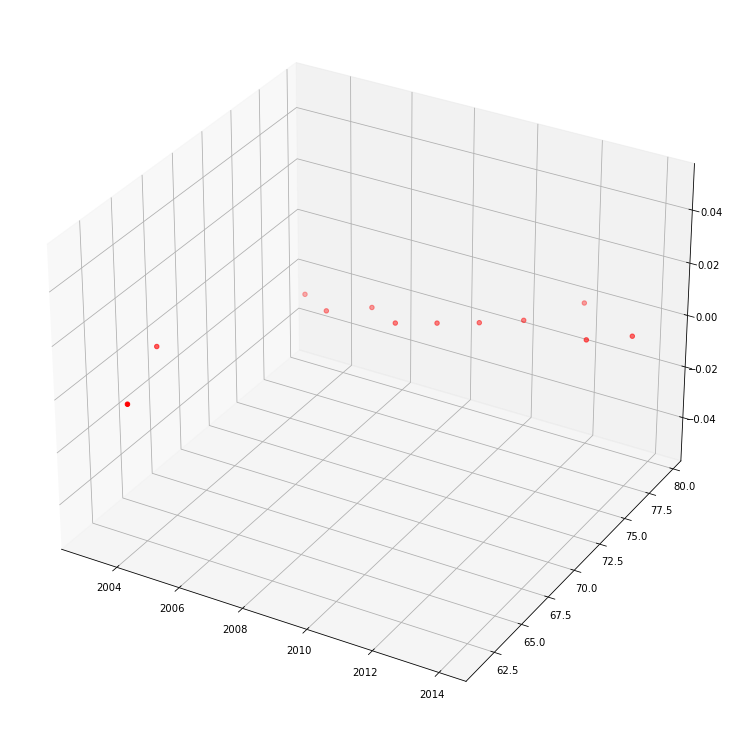

In [262]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year, AQI, color = 'red')
plt.show()

In [263]:
df

,year,temp,do,ph,co,bod,na,tc,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,1.366636e+04,0.000000,98.636364,...,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
1,2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5.426000e+03,0.000000,100.000000,...,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2,2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,9.506874e+04,76.806723,92.605042,...,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
3,2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,7.956023e+04,82.095238,90.476190,...,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
4,2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,7.729783e+04,83.333333,91.000000,...,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000
5,2008,26.787483,6.165945,7.105660,1361.647799,5.655158,1.504122,4.625321e+04,75.974843,87.044025,...,90.314465,50.817610,99.874214,12.535849,24.459371,21.133585,0.457358,2.796478,12.123648,73.506289
6,2009,27.011050,6.310912,7.203425,3184.406610,6.534475,2.395296,3.430333e+04,79.779006,87.624309,...,89.502762,33.922652,99.447514,13.163536,24.622431,20.943646,0.305304,2.784530,12.637238,74.456685
7,2010,26.521697,6.350280,7.201436,1957.287234,7.647608,1.698740,5.152104e+04,79.574468,91.063830,...,88.936170,47.021277,99.893617,13.129787,25.588936,20.811064,0.423191,2.797021,12.704787,75.454787
8,2011,26.081903,6.227706,7.297403,2351.420346,6.481041,1.548205,5.559991e+04,88.138528,88.225108,...,88.398268,46.406926,100.000000,14.542857,24.791255,20.685195,0.417662,2.800000,13.429610,76.666580
9,2012,26.396710,6.632534,7.298973,1401.078767,5.478699,1.573454,1.051480e+06,92.260274,90.684932,...,91.438356,54.109589,100.000000,15.222945,25.482466,21.396575,0.486986,2.800000,14.107740,79.496712


In [264]:
df = df[np.isfinite(df['wqi'])]
df.head()

,year,temp,do,ph,co,bod,na,tc,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,13666.356038,0.000000,98.636364,...,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
1,2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5426.000000,0.000000,100.000000,...,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2,2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,95068.742231,76.806723,92.605042,...,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
3,2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,79560.231615,82.095238,90.476190,...,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
4,2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,77297.827687,83.333333,91.000000,...,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000


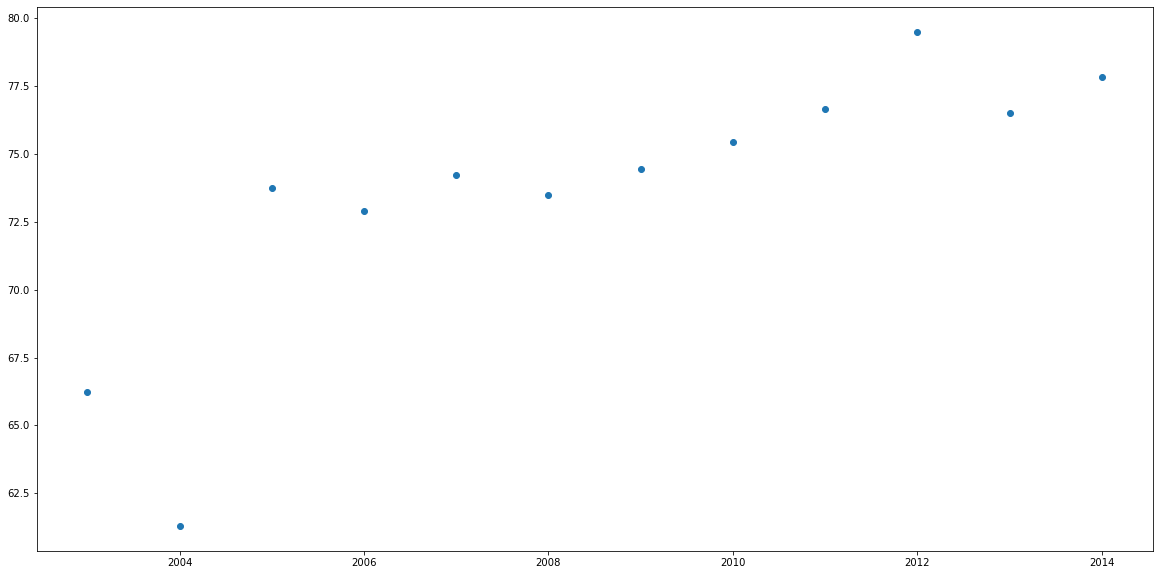

In [265]:
cols = ['year']
y = df['wqi']
x = df[cols]
plt.scatter(x, y)
plt.show()

In [266]:
from sklearn import neighbors, datasets
df = df.reset_index(level = 0, inplace = False)
df

,index,year,temp,do,ph,co,bod,na,tc,npH,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,1.366636e+04,0.000000,...,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
1,1,2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5.426000e+03,0.000000,...,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2,2,2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,9.506874e+04,76.806723,...,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
3,3,2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,7.956023e+04,82.095238,...,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
4,4,2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,7.729783e+04,83.333333,...,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000
5,5,2008,26.787483,6.165945,7.105660,1361.647799,5.655158,1.504122,4.625321e+04,75.974843,...,90.314465,50.817610,99.874214,12.535849,24.459371,21.133585,0.457358,2.796478,12.123648,73.506289
6,6,2009,27.011050,6.310912,7.203425,3184.406610,6.534475,2.395296,3.430333e+04,79.779006,...,89.502762,33.922652,99.447514,13.163536,24.622431,20.943646,0.305304,2.784530,12.637238,74.456685
7,7,2010,26.521697,6.350280,7.201436,1957.287234,7.647608,1.698740,5.152104e+04,79.574468,...,88.936170,47.021277,99.893617,13.129787,25.588936,20.811064,0.423191,2.797021,12.704787,75.454787
8,8,2011,26.081903,6.227706,7.297403,2351.420346,6.481041,1.548205,5.559991e+04,88.138528,...,88.398268,46.406926,100.000000,14.542857,24.791255,20.685195,0.417662,2.800000,13.429610,76.666580
9,9,2012,26.396710,6.632534,7.298973,1401.078767,5.478699,1.573454,1.051480e+06,92.260274,...,91.438356,54.109589,100.000000,15.222945,25.482466,21.396575,0.486986,2.800000,14.107740,79.496712


## Split the data into test and train

In [267]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [268]:
cols=['year']
df.head()

,index,year,temp,do,ph,co,bod,na,tc,npH,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,2003,26.438971,7.184007,2363.830576,26.728027,8.824319,0.940588,13666.356038,0.000000,...,91.818182,98.863636,100.000000,0.000000,27.716818,21.485455,0.889773,2.800000,13.347500,66.239545
1,1,2004,29.500000,7.650000,340.500000,6.450000,2.550000,1.905539,5426.000000,0.000000,...,90.000000,100.000000,100.000000,0.000000,28.100000,21.060000,0.900000,2.800000,8.430000,61.290000
2,2,2005,26.142516,6.497293,9.003793,1607.399986,11.722288,1.305859,95068.742231,76.806723,...,85.042017,41.344538,100.000000,12.673109,26.022017,19.899832,0.372101,2.800000,11.995630,73.762689
3,3,2006,24.827966,6.395202,7.267114,1582.455230,12.910886,1.876463,79560.231615,82.095238,...,84.380952,29.714286,99.809524,13.545714,25.423810,19.745143,0.267429,2.794667,11.132952,72.909714
4,4,2007,25.801748,6.349755,7.221667,1916.461660,8.273167,1.328731,77297.827687,83.333333,...,88.666667,45.000000,100.000000,13.750000,25.571000,20.748000,0.405000,2.800000,10.959000,74.233000


In [269]:
y = df['wqi']
x = df[cols]

## LinearRegression method

In [270]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
reg.fit(x_train, y_train)

LinearRegression()

In [271]:
a = reg.predict(x_test)
a

array([69.86400088, 71.09380768, 73.55342127])

In [272]:
y_test

3    72.909714
4    74.233000
6    74.456685
Name: wqi, dtype: float64

In [273]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:6.65


In [274]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})

#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.52542554],
       [ 1.        , -1.24807544],
       [ 1.        , -0.97072534],
       [ 1.        , -0.69337525],
       [ 1.        , -0.41602515],
       [ 1.        , -0.13867505],
       [ 1.        ,  0.13867505],
       [ 1.        ,  0.41602515],
       [ 1.        ,  0.69337525],
       [ 1.        ,  0.97072534],
       [ 1.        ,  1.24807544],
       [ 1.        ,  1.52542554]])

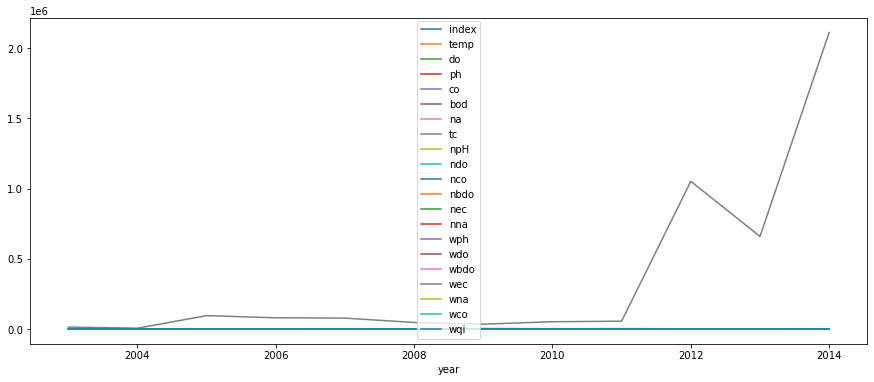

In [275]:
import matplotlib.pyplot as plt
df=df.set_index('year')
df.plot(figsize=(15,6))
plt.show()

In [276]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 73.53, 4.13


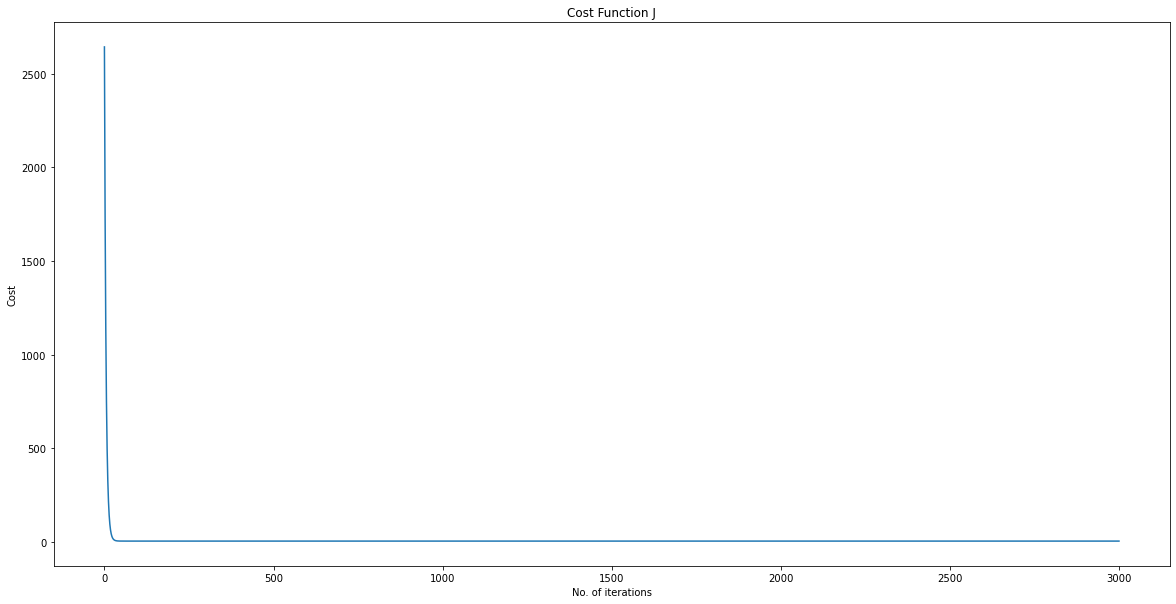

In [277]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

## Analysis the Actual and predicted values

In [278]:
import numpy as np
newB=[74.76, 2.13]

In [279]:
def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse

In [280]:
y_pred=x.dot(newB)
dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([df, dt], axis=1)
dt

,index,temp,do,ph,co,bod,na,tc,npH,ndo,...,nna,wph,wdo,wbdo,wec,wna,wco,wqi,Actual,Predicted
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.239545,71.510844
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.290000,72.101599
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.762689,72.692355
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.909714,73.283111
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.233000,73.873866
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.506289,74.464622
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.456685,75.055378
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.454787,75.646134
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.666580,76.236889
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.496712,76.827645


## Measure the performance using Metrics

In [281]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

3.600869035870176


In [282]:
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([df, dt], axis=1)
dt

,index,temp,do,ph,co,bod,na,tc,npH,ndo,...,nna,wph,wdo,wbdo,wec,wna,wco,wqi,Actual,Predicted
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.239545,71.510844
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.290000,72.101599
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.762689,72.692355
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.909714,73.283111
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.233000,73.873866
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.506289,74.464622
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.456685,75.055378
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.454787,75.646134
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.666580,76.236889
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.496712,76.827645


In [283]:
import joblib
joblib.dump (reg,"WQI.pkl" )

['WQI.pkl']